In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('/content/dataset_penyisihan_bdc_2024.csv',sep=';')
df.head()

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik


In [3]:
import re
import string

def clean_text(tweet):

    # Convert to lower case
    tweet = tweet.lower()
    # remove unicode characters
    tweet = tweet.encode('ascii', 'ignore').decode()
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub("\\W"," ",tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('\,', ' ', tweet)
    tweet = re.sub('\)', ' ', tweet)
    tweet = re.sub('\:', ' ', tweet)
    tweet = re.sub('\-', ' ', tweet)
    tweet = re.sub('\!', ' ', tweet)
    tweet = re.sub('\"', ' ', tweet)
    tweet = re.sub('\.', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')

    return tweet

df["text"] = df['text'].map(lambda x: clean_text(x))
df = df[df['text'].apply(lambda x: len(x.split()) >=1)]
df

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,rt anies dapat tepuk tangan meriah saat jadi r...,Politik
2,emng bener sih pendukung ada yg goblok begitu...,Demografi
3,rt sewaktu anies bersikap kritis ke kinerja pa...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,rt ngeliat debat kemaren pas prabowo kicep kek...,Politik
4996,masyarakat yakin bahwa prabowo gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,look at that pak ganjar anda sdh berkecimpung...,Pertahanan dan Keamanan


In [4]:
def wordopt(text):
    text = re.sub(' gak ', ' tidak ', text)
    text = re.sub(' tdk ', ' tidak ', text)
    text = re.sub(' tak ', ' tidak ', text)
    text = re.sub(' ga ', ' tidak ', text)
    text = re.sub(' gk ', ' tidak ', text)
    text = re.sub('yg ', 'yang ', text)
    text = re.sub(' tp ', ' tapi ', text)
    text = re.sub(' jdi ', ' jadi ', text)
    text = re.sub(' jd ', ' jadi ', text)
    text = re.sub(' org ', ' orang ', text)
    text = re.sub(' hehe ', ' ', text)
    text = re.sub(' hehehe ', ' ', text)
    text = re.sub(' wakakak ', ' ', text)
    text = re.sub(' jls ', ' jelas ', text)
    text = re.sub(' sdh ', ' sudah ', text)
    text = re.sub(' trus ', ' terus ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' sy ', ' saya ', text)
    text = re.sub(' aku ', ' saya ', text)
    text = re.sub(' gue ', ' saya ', text)
    text = re.sub(' blm ', ' belum ', text)
    text = re.sub('klo ', ' kalau ', text)
    text = re.sub('kalo ', ' kalau ', text)
    text = re.sub(' calon presiden ', ' capres ', text)
    text = re.sub(' mega ', ' megawati ', text)
    text = re.sub(' jkt ', ' jakarta ', text)
    text = re.sub(' deh ', ' ', text)
    text = re.sub(' wakilnya ', ' wakil ', text)
    text = re.sub(' lg ', ' lagi ', text)
    text = re.sub(' gt ', ' gitu ', text)
    text = re.sub(' ahhh ', ' ', text)
    text = re.sub(' cm ', ' hanya ', text)
    text = re.sub(' dr ', ' dari ', text)
    text = re.sub(' kan ', ' ', text)
    text = re.sub(' akn ', ' akan ', text)
    text = re.sub(' nih ', ' ', text)
    text = re.sub(' jg ', ' juga ', text)
    text = re.sub(' cawapresnya ', ' cawapres ', text)
    text = re.sub(' d ', ' ', text)
    text = re.sub(' p ', ' ', text)
    text = re.sub(' bu ', ' ibu ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' jgn ', ' jangan ', text)
    text = re.sub(' sbg ', ' sebagai ', text)
    text = re.sub(' pd ', ' pada ', text)
    text = re.sub(' pa ', ' bapak ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' kok ', ' ', text)
    text = re.sub(' om ', ' paman ', text)
    text = re.sub(' gub ', ' gubernur ', text)
    text = re.sub(' aja ', ' saja ', text)
    text = re.sub(' joko widodo ', ' jokowi ', text)
    text = re.sub('tuit', ' tweet ', text)
    text = re.sub(' nya ', ' ', text)
    text = re.sub(' dong ', ' ', text)
    text = re.sub(' cuma ', ' hanya ', text)
    text = re.sub(' dgn ', ' dengan ', text)
    text = re.sub(' dg ', ' dengan ', text)

    return text

df['text']=df['text'].apply(wordopt)
df

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,rt anies dapat tepuk tangan meriah saat jadi r...,Politik
2,emng bener sih pendukung ada yang goblok begi...,Demografi
3,rt sewaktu anies bersikap kritis ke kinerja pa...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,rt ngeliat debat kemaren pas prabowo kicep kek...,Politik
4996,masyarakat yakin bahwa prabowo gibran memiliki...,Politik
4997,imo both are irrational but yang satu jauh leb...,Ekonomi
4998,look at that pak ganjar anda sudah berkecimpu...,Pertahanan dan Keamanan


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3992,), (3992,), (499,), (499,))

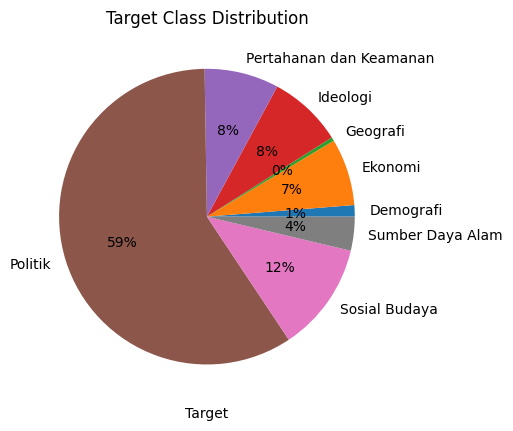

In [6]:
unique,count=np.unique(y_train,return_counts=True)
plt.pie(x=count,labels=unique,autopct='%.0f%%')
plt.xlabel('Target')
plt.title('Target Class Distribution')
plt.show()

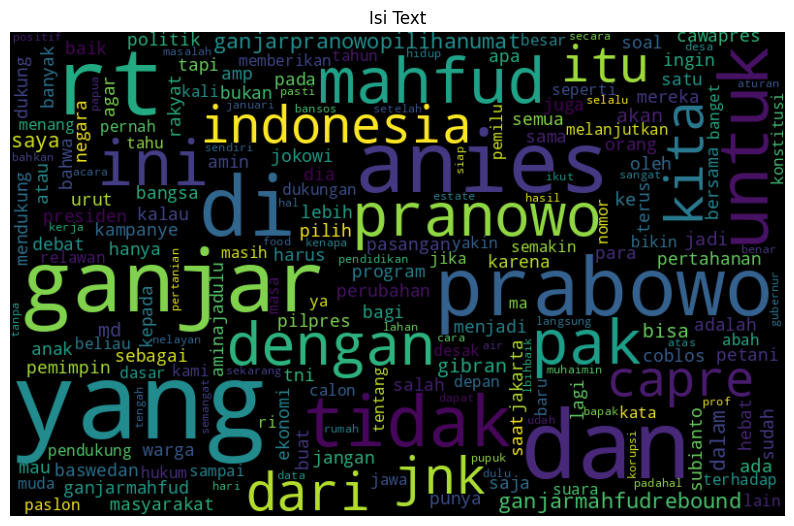

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_word = ' '.join(x_train)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Isi Text")
plt.show()

In [8]:
!pip install Sastrawi

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [10]:
from sklearn.manifold import TSNE
vectorizer=TfidfVectorizer(stop_words=stopwords)
decomposer=TSNE(n_components=2,random_state=42,verbose=1,n_jobs=-1)
x_decompose=decomposer.fit_transform(vectorizer.fit_transform(x_train).toarray())
x_decompose[:5,:]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3992 samples in 0.030s...
[t-SNE] Computed neighbors for 3992 samples in 25.763s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3992
[t-SNE] Computed conditional probabilities for sample 2000 / 3992
[t-SNE] Computed conditional probabilities for sample 3000 / 3992
[t-SNE] Computed conditional probabilities for sample 3992 / 3992
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.878128
[t-SNE] KL divergence after 1000 iterations: 2.151777


array([[  5.3750124,   6.7705154],
       [ 36.23054  , -15.697868 ],
       [ 22.326101 , -45.20462  ],
       [-42.97095  , -37.333443 ],
       [-74.26451  ,  22.662037 ]], dtype=float32)

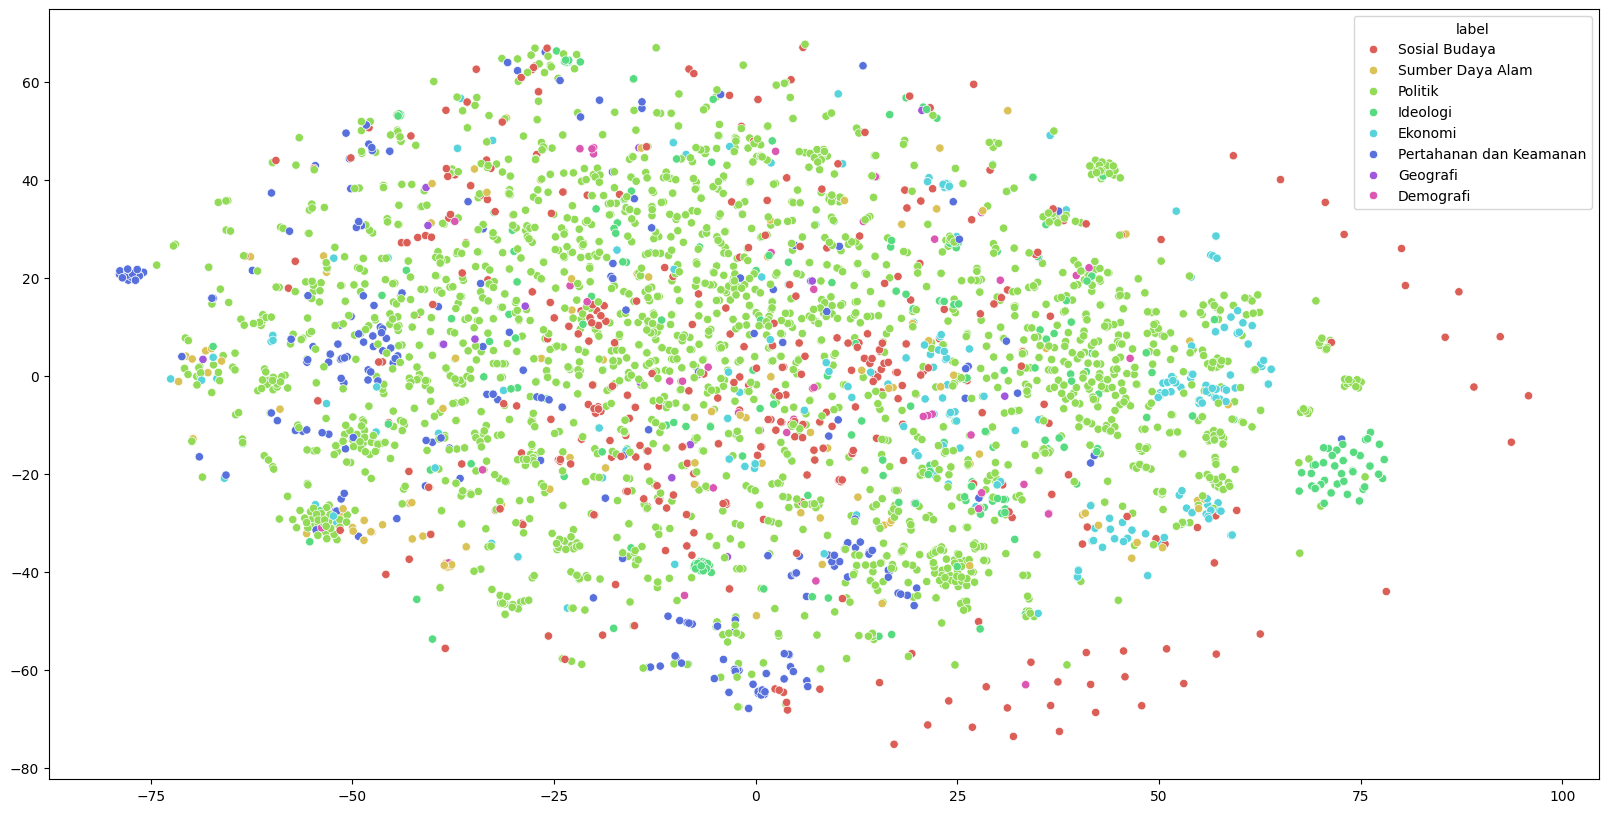

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=x_decompose[:,0],y=x_decompose[:,1],hue=y_train,palette=sns.color_palette("hls", 8))
plt.show()

In [12]:
decomposer1=TSNE(n_components=3,random_state=42,verbose=1,n_jobs=-1)
x_decompose1=decomposer1.fit_transform(vectorizer.fit_transform(x_train).toarray())
data=np.concatenate((x_decompose1,y_train.to_numpy().reshape(-1,1)),axis=1)
data[:5,:]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3992 samples in 0.082s...
[t-SNE] Computed neighbors for 3992 samples in 34.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3992
[t-SNE] Computed conditional probabilities for sample 2000 / 3992
[t-SNE] Computed conditional probabilities for sample 3000 / 3992
[t-SNE] Computed conditional probabilities for sample 3992 / 3992
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.878189
[t-SNE] KL divergence after 1000 iterations: 2.105765


array([[-2.7526750564575195, 5.048076152801514, 9.00495433807373,
        'Sosial Budaya'],
       [8.028510093688965, -14.789994239807129, 22.072799682617188,
        'Sumber Daya Alam'],
       [-8.329826354980469, 11.038942337036133, 25.210205078125,
        'Politik'],
       [18.600133895874023, -0.6806122064590454, -35.40825653076172,
        'Sumber Daya Alam'],
       [-39.09605407714844, 7.4587554931640625, -22.75333595275879,
        'Politik']], dtype=object)

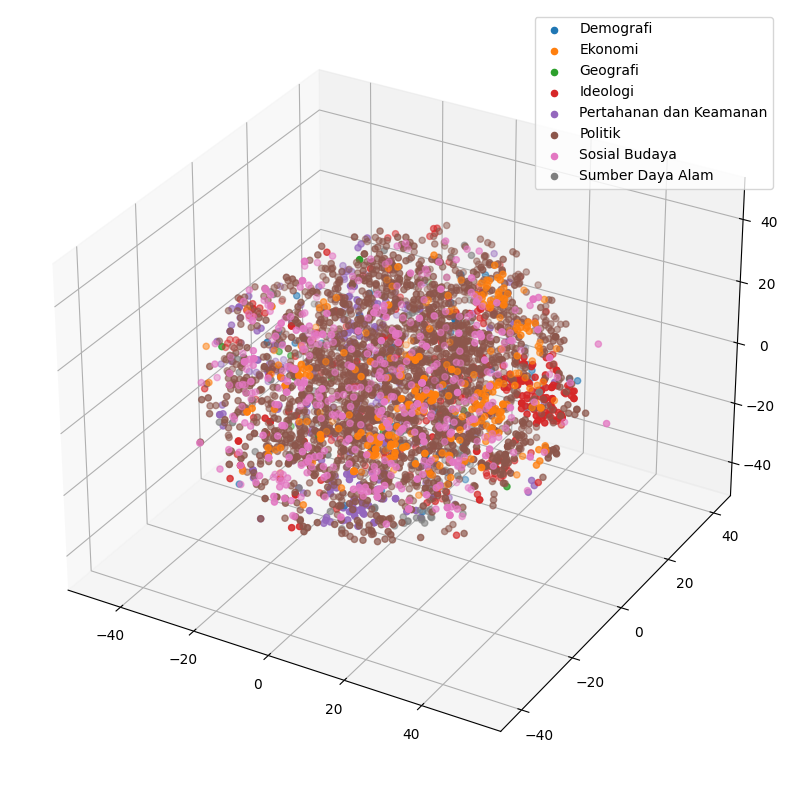

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
for s in np.unique(data[:,-1]):
    ax.scatter(data[data[:,-1]==s][:,0],data[data[:,-1]==s][:,1],data[data[:,-1]==s][:,2],label=s)
ax.legend()

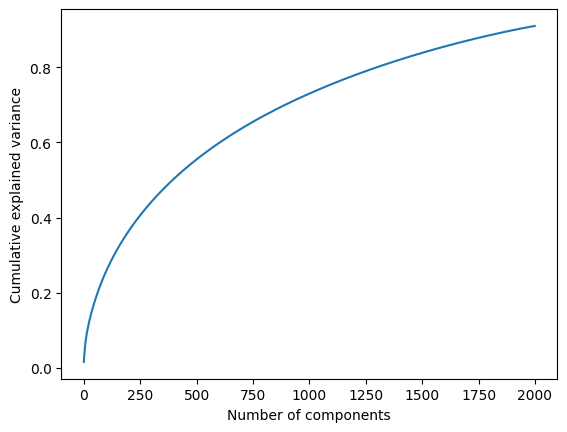

In [14]:
from sklearn.decomposition import TruncatedSVD
svd_test = TruncatedSVD(n_components = 2000, random_state=42)
svd_test.fit(vectorizer.fit_transform(x_train).toarray())
plt.plot(np.cumsum(svd_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [15]:
x_train=svd_test.transform(vectorizer.fit_transform(x_train).toarray())
x_test=svd_test.transform(vectorizer.transform(x_test).toarray())
x_valid=svd_test.transform(vectorizer.transform(x_valid).toarray())
x_train.shape

(3992, 2000)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
y_valid=encoder.transform(y_valid)
y_train

array([6, 7, 5, ..., 6, 5, 5])

In [17]:
#run ini kalau udah pernah save model, kalau belum, jangan
with open('/content/model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
best_params={'n_estimators': 900,
  'max_bin': 2288,
  'colsample_bytree': 0.5,
  'max_leaves': 18,
  'max_depth': 14,
  'reg_alpha': 0.2,
  'learning_rate': 0.1,
  'reg_lambda': 0.1,
  'subsample': 0.9,
  'random_state': 42,
  'n_jobs': -1,
  'grow_policy': 'lossguide',
  'verbosity':2,
  'early_stopping_rounds':10}

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(**best_params)

In [ ]:
model.fit(x_train,y_train,eval_set=[(x_valid, y_valid)])
accuracy_score(y_test,model.predict(x_test))

[0]	validation_0-mlogloss:1.90037
[1]	validation_0-mlogloss:1.76105
[2]	validation_0-mlogloss:1.64930
[3]	validation_0-mlogloss:1.55859
[4]	validation_0-mlogloss:1.48104
[5]	validation_0-mlogloss:1.41263
[6]	validation_0-mlogloss:1.35510
[7]	validation_0-mlogloss:1.30461
[8]	validation_0-mlogloss:1.26078
[9]	validation_0-mlogloss:1.22266
[10]	validation_0-mlogloss:1.18480
[11]	validation_0-mlogloss:1.14965
[12]	validation_0-mlogloss:1.12174
[13]	validation_0-mlogloss:1.09522
[14]	validation_0-mlogloss:1.07395
[15]	validation_0-mlogloss:1.05200
[16]	validation_0-mlogloss:1.03375
[17]	validation_0-mlogloss:1.01477
[18]	validation_0-mlogloss:0.99720
[19]	validation_0-mlogloss:0.98300
[20]	validation_0-mlogloss:0.96964
[21]	validation_0-mlogloss:0.95751
[22]	validation_0-mlogloss:0.94366
[23]	validation_0-mlogloss:0.93252
[24]	validation_0-mlogloss:0.92318
[25]	validation_0-mlogloss:0.91337
[26]	validation_0-mlogloss:0.90530
[27]	validation_0-mlogloss:0.89576
[28]	validation_0-mlogloss:0.8

0.7655310621242485

In [18]:
def evaluation_parametrics(name, y_val, y_pred):

    print("\n------------------------{}------------------------\n".format(name))
    y_val=encoder.inverse_transform(y_val)
    y_pred=encoder.inverse_transform(y_pred)
    cm_test = confusion_matrix(y_val, y_pred)
    print("\nClassification Report\n")
    print(classification_report(y_val, y_pred, target_names=encoder.classes_))
    print("--------------------------------------------------------------------------")
    plt.figure(figsize=(16, 14))
    sns.heatmap(cm_test,annot=True,fmt='g',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
    plt.show()


------------------------Confusion Matrix - Test Dataset------------------------


Classification Report

                         precision    recall  f1-score   support

              Demografi       0.00      0.00      0.00         7
                Ekonomi       0.88      0.63      0.73        35
               Geografi       0.00      0.00      0.00         1
               Ideologi       0.88      0.39      0.55        38
Pertahanan dan Keamanan       0.89      0.52      0.65        33
                Politik       0.75      0.97      0.85       306
          Sosial Budaya       0.71      0.42      0.53        59
       Sumber Daya Alam       0.88      0.35      0.50        20

               accuracy                           0.77       499
              macro avg       0.62      0.41      0.48       499
           weighted avg       0.77      0.77      0.74       499

--------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


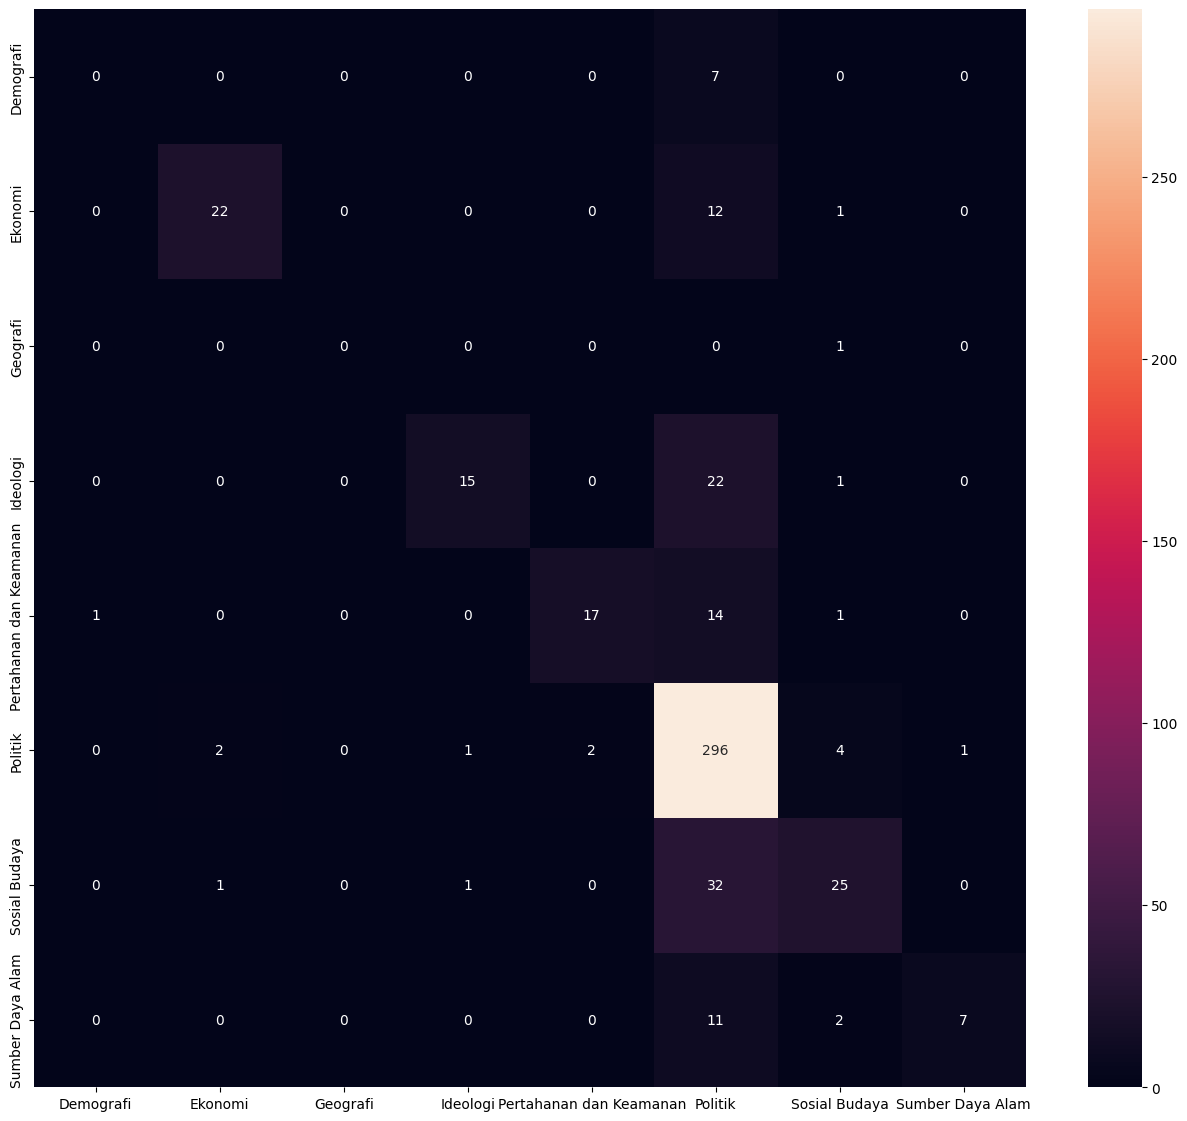

In [19]:
evaluation_parametrics("Confusion Matrix - Test Dataset", y_test, model.predict(x_test))


------------------------Confusion Matrix - Validation Dataset------------------------


Classification Report



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

              Demografi       0.00      0.00      0.00         5
                Ekonomi       0.85      0.58      0.69        38
               Geografi       0.00      0.00      0.00         2
               Ideologi       0.94      0.45      0.61        38
Pertahanan dan Keamanan       0.85      0.55      0.67        42
                Politik       0.76      0.97      0.85       304
          Sosial Budaya       0.75      0.50      0.60        48
       Sumber Daya Alam       1.00      0.35      0.52        23

               accuracy                           0.78       500
              macro avg       0.64      0.42      0.49       500
           weighted avg       0.79      0.78      0.75       500

--------------------------------------------------------------------------


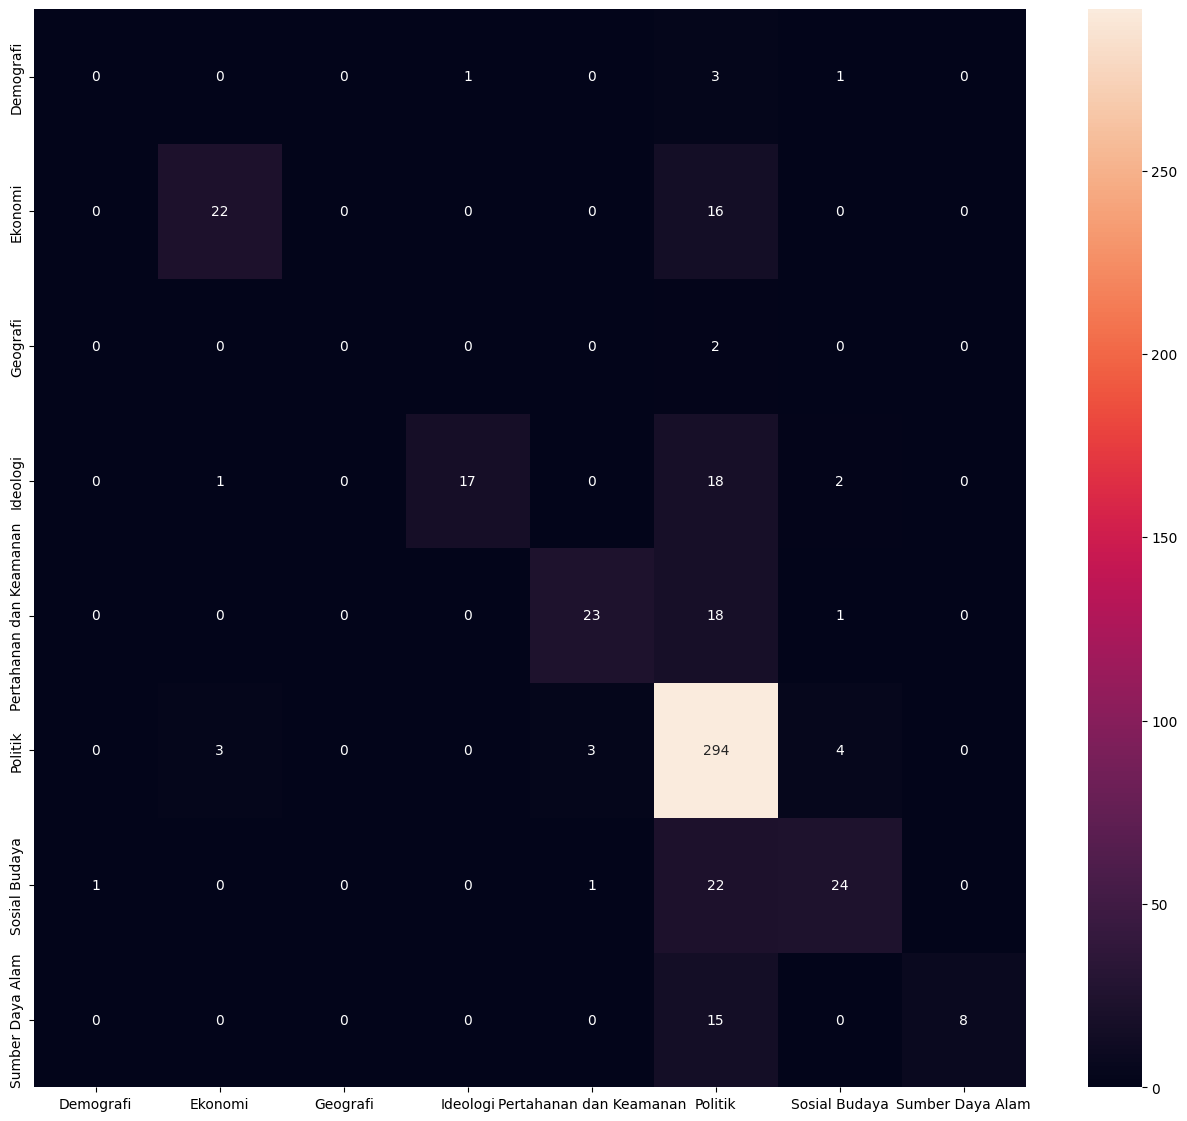

In [20]:
evaluation_parametrics("Confusion Matrix - Validation Dataset", y_valid, model.predict(x_valid))

In [25]:
with open('/content/model.pkl','wb') as f:
    pickle.dump(model,f)